In [1]:
ticker = 'aapl'

In [2]:
ticker = ticker.upper()

from IPython.display import HTML
HTML('<h1>Report for {}</h1>'.format(ticker))

In [3]:
%matplotlib inline
import pyEX
import lantern as l
import pandas as pd
import seaborn as sns

sns.set()

In [4]:
HTML('<h2>Performance</h2>')

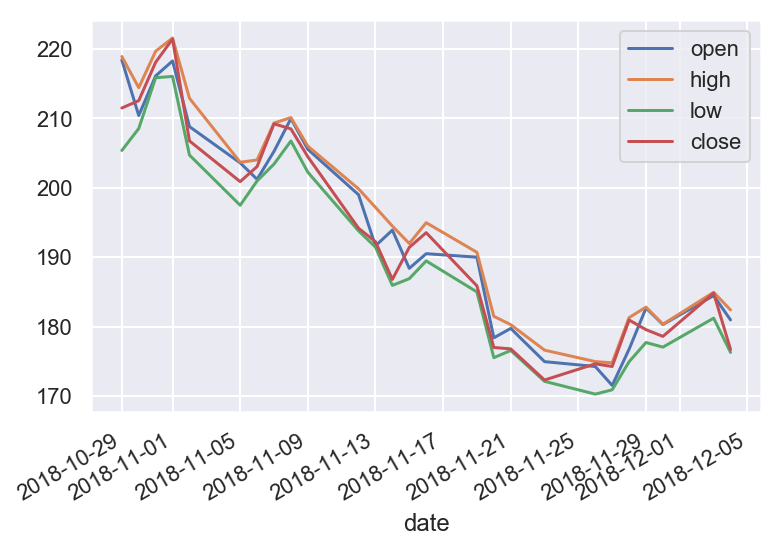

In [5]:
df = pyEX.chartDF(ticker)
df[['open', 'high', 'low', 'close']].plot()

In [6]:
HTML('<h2>Peer Correlation</h2>')

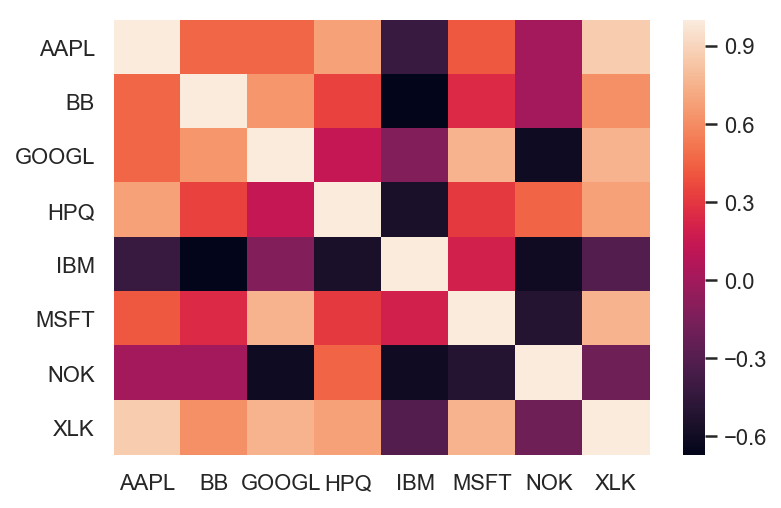

In [7]:
peers = pyEX.peers(ticker)
to_merge = {x: pyEX.chartDF(x) for x in peers}
to_merge.update({ticker: df})
all = sorted(peers + [ticker])
rets = pd.concat(to_merge)
rets = rets.unstack(0)['changePercent'][all]
rets = rets.corr()
rets['symbol'] = rets.index
sns.heatmap(rets.corr())